In [1]:
# imports
from importlib import reload

import os # a module to interact with the operating system
os.environ["ENDPOINT_URL"]="http://rook-ceph-rgw-nautiluss3.rook"
import numpy as np

import pandas as pd
import xarray
import h5py

from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting

# Load Table

In [2]:
os.getenv('ENDPOINT_URL')
modis_tbl = ulmo_io.load_main_table('s3://modis-l2/Tables/MODIS_L2_std.parquet')

Read main table: s3://modis-l2/Tables/MODIS_L2_std.parquet


### Remove clouds & Nan cutouts

In [3]:
clear = modis_tbl.clear_fraction < 0.005
value = ~ modis_tbl.LL.isnull()
tbl = modis_tbl[ clear & value]

# Global Ratio

## calculate 3 bin thresholds

In [4]:
LL_tail = np.percentile( tbl.LL.to_numpy(), 0.1)
LL_tail

-304.45994213867186

In [5]:
LL_head = np.percentile( tbl.LL.to_numpy(), 20)
LL_head

167.73349609375

# Regional Ratios

## Indian Ocean

In [10]:
dlat = (tbl.lat > 0) & (tbl.lat < 25)
dlon = (tbl.lon > 50)  & (tbl.lon < 80)

indian = tbl [ dlat & dlon ]

In [11]:
LL_tail = np.percentile( indian.LL.to_numpy(), 0.1)
LL_tail

-245.07218078613283

In [12]:
LL_head = np.percentile( indian.LL.to_numpy(), 20)
LL_head

309.646337890625

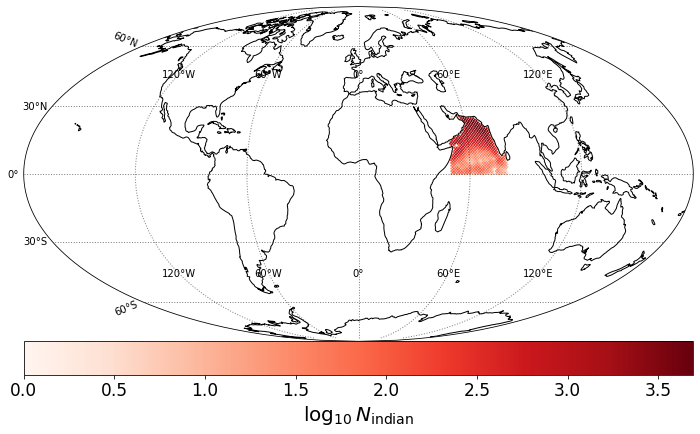

In [13]:
_ = ulmo_figs.show_spatial(indian, lbl = 'indian')

## West Australian Coast

In [31]:
dlat = (tbl.lat > -30) & (tbl.lat < -10)
dlon = (tbl.lon > 100)  & (tbl.lon < 130)

austr = tbl [ dlat & dlon ]

In [32]:
LL_tail = np.percentile( austr.LL.to_numpy(), 0.1)
LL_tail

-139.3079818725586

In [33]:
LL_head = np.percentile( austr.LL.to_numpy(), 20)
LL_head

252.10500488281252

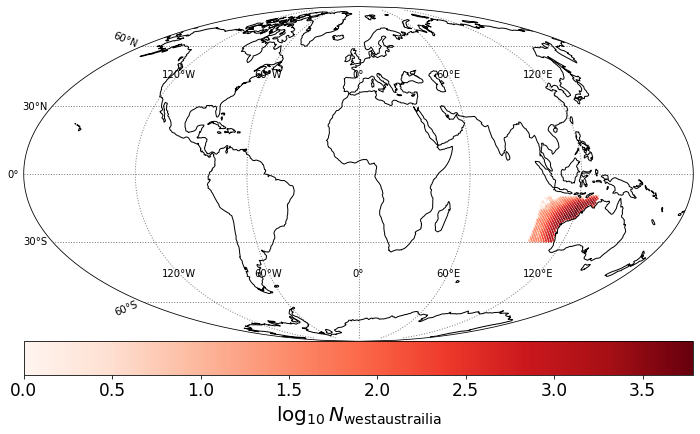

In [34]:
_ = ulmo_figs.show_spatial(austr, lbl = 'west austrailia')

## Madagascar

In [53]:
dlat = (tbl.lat > -30) & (tbl.lat < -10)
dlon = (tbl.lon > 30)  & (tbl.lon < 45)

madag = tbl [ dlat & dlon ]

In [54]:
LL_tail = np.percentile( madag.LL.to_numpy(), 0.1)
LL_tail

-153.68963745117188

In [55]:
LL_head = np.percentile( madag.LL.to_numpy(), 20)
LL_head

180.31298828125

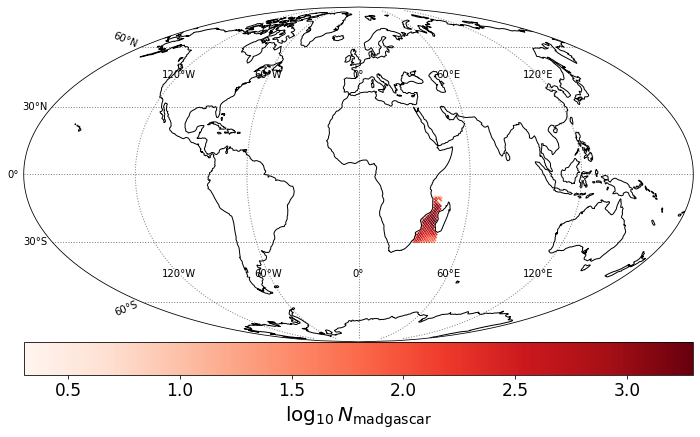

In [56]:
_ = ulmo_figs.show_spatial(madag, lbl = 'madgascar')

## Mediterranean

In [59]:
dlat = (tbl.lat > 30) & (tbl.lat < 45)
dlon = (tbl.lon > -5)  & (tbl.lon < 35)

medit = tbl [ dlat & dlon ]

In [63]:
LL_tail = np.percentile( medit.LL.to_numpy(), 0.1)
LL_tail

-287.27589486694336

In [64]:
LL_head = np.percentile( medit.LL.to_numpy(), 20)
LL_head

150.84718017578126

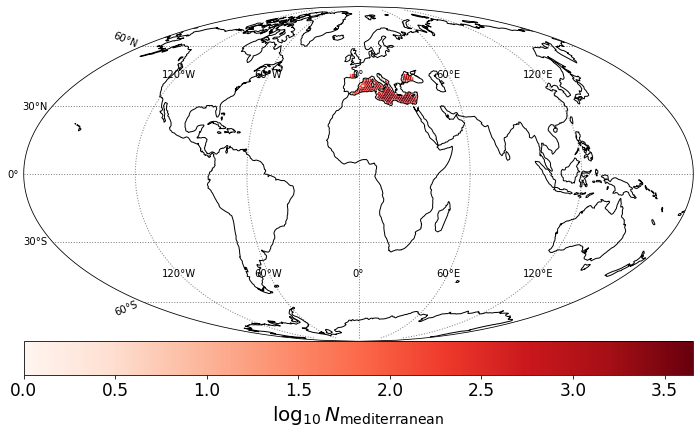

In [65]:
_ = ulmo_figs.show_spatial(medit, lbl = 'mediterranean')

## Japan Sea

In [76]:
dlat = (tbl.lat > 45) & (tbl.lat < 60)
dlon = (tbl.lon > 140)  & (tbl.lon < 155)

japan = tbl [ dlat & dlon ]

In [77]:
LL_tail = np.percentile( japan.LL.to_numpy(), 0.1)
LL_tail

-310.66470678710937

In [78]:
LL_head = np.percentile( japan.LL.to_numpy(), 20)
LL_head

7.424731445312531

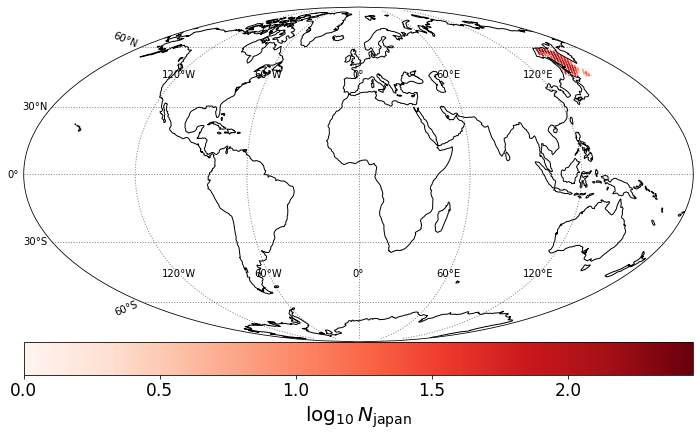

In [75]:
_ = ulmo_figs.show_spatial(japan, lbl = 'japan')

In [79]:
## Patagonian Shelf

## Equatorial Pacific

In [88]:
dlon = (tbl.lon > -180.) & (tbl.lon < -90.)
dlat = (tbl.lat > -5) & (tbl.lat < 5)

equat = tbl [ dlon & dlat ]

In [89]:
LL_tail = np.percentile( equat.LL.to_numpy(), 0.1)
LL_tail

-87.09341937255857

In [90]:
LL_head = np.percentile( equat.LL.to_numpy(), 20)
LL_head

370.1948486328125

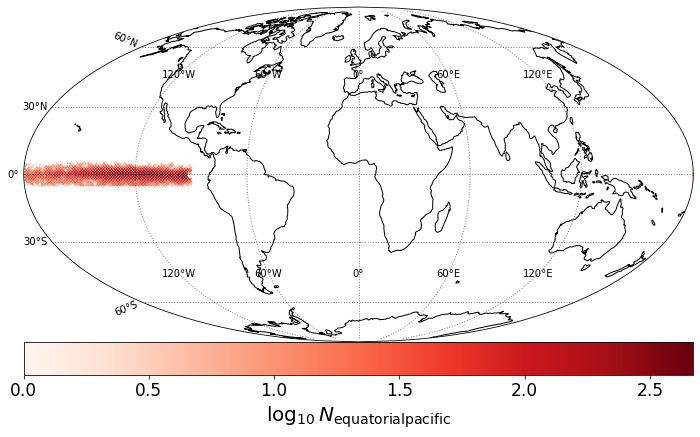

In [91]:
_ = ulmo_figs.show_spatial(equat, lbl = 'equatorial pacific')